#   Project 2 - Client Gender Analysis

# Import Libraries 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [68]:
df1 = pd.read_csv("/Users/jamilyalipons/Documents/Iron hack/Project A:B/vanguard-ab-test-Alejandro/data/clean/clean_df_demo.csv")

In [69]:
df1


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2.0,45105.30,6.0,9.0
1,2304905,7,94,58,U,2.0,110860.30,6.0,9.0
2,1439522,5,64,32,U,2.0,52467.79,6.0,9.0
3,1562045,16,198,49,M,2.0,67454.65,3.0,6.0
4,5126305,12,145,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70587,7993686,4,56,38,U,3.0,1411062.68,5.0,5.0
70588,8981690,12,148,31,M,2.0,101867.07,6.0,6.0
70589,333913,16,198,61,F,2.0,40745.00,3.0,3.0
70590,1573142,21,255,68,M,3.0,475114.69,4.0,4.0


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [71]:
df2 = pd.read_csv("/Users/jamilyalipons/Documents/Iron hack/Project A:B/vanguard-ab-test-Alejandro/data/clean/clean_df_experiment_clients.csv")

In [72]:
df2


,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [73]:
# Merge df_final_web_data_pt_1 and df_final_web_data_pt_2
merged_data = pd.merge(df1, df2,on='client_id')
                        
                        

In [74]:
print(merged_data)



       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gender  \
0         836976               6                73        60      U   
1        2304905               7                94        58      U   
2        1439522               5                64        32      U   
3        1562045              16               198        49      M   
4        5126305              12               145        33      F   
...          ...             ...               ...       ...    ...   
70587    7993686               4                56        38      U   
70588    8981690              12               148        31      M   
70589     333913              16               198        61      F   
70590    1573142              21               255        68      M   
70591    5602139              21               254        59      F   

       num_accts     balance  calls_6_mnth  logons_6_mnth variation  
0            2.0    45105.30           6.0            9.0      Test  
1      

In [75]:
# Assuming 'column_to_drop' is the name of the column you want to eliminate
merged_data = merged_data.drop(columns=['clnt_tenure_yr','clnt_tenure_mnth','num_accts','balance','calls_6_mnth'])

In [76]:
print(merged_data.columns)


Index(['client_id', 'clnt_age', 'gender', 'logons_6_mnth', 'variation'], dtype='object')


In [77]:
print(merged_data)


       client_id  clnt_age gender  logons_6_mnth variation
0         836976        60      U            9.0      Test
1        2304905        58      U            9.0   Control
2        1439522        32      U            9.0      Test
3        1562045        49      M            6.0      Test
4        5126305        33      F            3.0   Control
...          ...       ...    ...            ...       ...
70587    7993686        38      U            5.0       NaN
70588    8981690        31      M            6.0       NaN
70589     333913        61      F            3.0       NaN
70590    1573142        68      M            4.0       NaN
70591    5602139        59      F            7.0       NaN

[70592 rows x 5 columns]


In [78]:
variation = ['Control', 'Test']
Clean_Data = merged_data[merged_data['variation'].isin(variation)]
Clean_Data


,client_id,clnt_age,gender,logons_6_mnth,variation
0,836976,60,U,9.0,Test
1,2304905,58,U,9.0,Control
2,1439522,32,U,9.0,Test
3,1562045,49,M,6.0,Test
4,5126305,33,F,3.0,Control
...,...,...,...,...,...
50481,1780858,68,M,9.0,Test
50482,6967120,68,M,9.0,Control
50483,5826160,56,F,5.0,Test
50484,8739285,69,F,4.0,Test


In [79]:
# Create a new dataframe with selected columns
new_dataframe = Clean_Data[['client_id', 'gender', 'variation']]



In [80]:
new_dataframe



,client_id,gender,variation
0,836976,U,Test
1,2304905,U,Control
2,1439522,U,Test
3,1562045,M,Test
4,5126305,F,Control
...,...,...,...
50481,1780858,M,Test
50482,6967120,M,Control
50483,5826160,F,Test
50484,8739285,F,Test


In [81]:
# Create a new dataframe with filtered values
new_dataframe_filtered = new_dataframe[(new_dataframe['gender'] != 'U')]


In [82]:
new_dataframe_filtered


,client_id,gender,variation
3,1562045,M,Test
4,5126305,F,Control
7,388801,M,Test
8,285619,M,Control
9,8198645,F,Test
...,...,...,...
50481,1780858,M,Test
50482,6967120,M,Control
50483,5826160,F,Test
50484,8739285,F,Test


In [83]:
# Create separate dataframes for 'Test' and 'Control'
test_data = new_dataframe_filtered[new_dataframe_filtered['variation'] == 'Test']
control_data = new_dataframe_filtered[new_dataframe_filtered['variation'] == 'Control']

# Display the first few rows of the test and control dataframes
print("Test Data:")
print(test_data)

print("Control Data:")
print(control_data)

Test Data:
       client_id gender variation
3        1562045      M      Test
7         388801      M      Test
9        8198645      F      Test
13       2214073      M      Test
18        719792      F      Test
...          ...    ...       ...
50478     501496      F      Test
50481    1780858      M      Test
50483    5826160      F      Test
50484    8739285      F      Test
50485    7468138      F      Test

[17693 rows x 3 columns]
Control Data:
       client_id gender variation
4        5126305      F   Control
8         285619      M   Control
17       3788589      M   Control
24       9520009      M   Control
28       3055315      F   Control
...          ...    ...       ...
50472    6662941      F   Control
50477    2787512      F   Control
50479    9932367      F   Control
50480    4079649      M   Control
50482    6967120      M   Control

[15513 rows x 3 columns]


# Gender- Variation Analysis

# Hypothesis

Null Hypothesis (H0): There are no gender differences that affect engaging with the new or old process.

Alternative Hypothesis (H1): There are gender differences that affect engaging with the new or old process.

In [84]:
cross_table = pd.crosstab(df1['gender'][df1['gender'] != 'U'], df2['variation']).sort_values(by=['Test','Control'], ascending=False)
cross_table


variation,Control,Test
gender,,
M,7856,9094
F,7644,8621


# Chi-Square Test 


In [85]:
from scipy.stats import chi2_contingency


In [86]:
chi2_stat, p_value, _, _ = chi2_contingency(cross_table)
chi2_stat, p_value


(1.3767263381592265, 0.2406595590067408)

In [87]:
print(f"chi2_stat: {chi2_stat}")
print(f"p_value: {p_value}")


chi2_stat: 1.3767263381592265
p_value: 0.2406595590067408


In [88]:
if p_value<0.05:
    print('gender differences affect engaging with the new or old process')
else:
    print('no gender differences affect engaging with the new or old process')


no gender differences affect engaging with the new or old process


# Hypothesis Results 
p-value= 0.2406595590067408

Our p-value indicate no strong evidence of a significant association between gender groups and engaging with the new or old process

We don't rejected the null hypothesis (H0)

In [89]:
 # Computing the association between variables in 'crosstab_result' using the "cramer" method
from scipy.stats.contingency import association


association(cross_table, method="cramer")



0.006498445575822337

In [90]:
cross_table.head(3)



variation,Control,Test
gender,,
M,7856,9094
F,7644,8621


# Visualizations


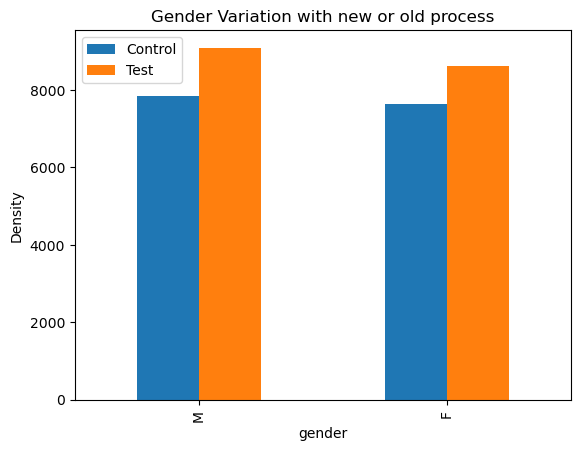

In [91]:
# Plotting a stacked bar chart for the 'crosstab_result' data
cross_table.head(2).plot(kind='bar')
plt.title('Gender Variation with new or old process')
plt.ylabel('Density')
plt.legend()
plt.show()



In [26]:
df_demo = pd.read_csv("/Users/jamilyalipons/Documents/Iron hack/Project A:B/vanguard-ab-test-Alejandro/data/clean/clean_df_demo.csv")
df_experiment_clients = pd.read_csv("/Users/jamilyalipons/Documents/Iron hack/Project A:B/vanguard-ab-test-Alejandro/data/clean/clean_df_experiment_clients.csv")
data_web_pt_1 = pd.read_csv("/Users/jamilyalipons/Documents/Iron hack/Project A:B/vanguard-ab-test-Alejandro/data/clean/clean_df_web_data_pt_1.csv")
data_web_pt_2 = pd.read_csv("/Users/jamilyalipons/Documents/Iron hack/Project A:B/vanguard-ab-test-Alejandro/data/clean/clean_df_web_data_pt_2.csv")

In [27]:
data_web_pt_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
341041,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
341042,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
341043,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
341044,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [28]:
data_web_pt_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
403590,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
403591,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
403592,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
403593,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [29]:
# Concatenate (merge) df_final_web_data_pt_1 and df_final_web_data_pt_2
merged_data = pd.concat([data_web_pt_1, data_web_pt_2], ignore_index=True)



In [30]:
merged_data



,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [31]:
df_demo



,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2.0,45105.30,6.0,9.0
1,2304905,7,94,58,U,2.0,110860.30,6.0,9.0
2,1439522,5,64,32,U,2.0,52467.79,6.0,9.0
3,1562045,16,198,49,M,2.0,67454.65,3.0,6.0
4,5126305,12,145,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70587,7993686,4,56,38,U,3.0,1411062.68,5.0,5.0
70588,8981690,12,148,31,M,2.0,101867.07,6.0,6.0
70589,333913,16,198,61,F,2.0,40745.00,3.0,3.0
70590,1573142,21,255,68,M,3.0,475114.69,4.0,4.0


In [32]:
data = merged_data.copy()



In [33]:
data



,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
744636,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
744637,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
744638,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
744639,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [34]:
pivot_steps = merged_data.pivot_table(index='client_id', columns='process_step', aggfunc='size', fill_value=0)
pivot_steps


process_step,confirm,start,step_1,step_2,step_3
client_id,,,,,
169,1,1,1,1,1
336,0,2,0,0,0
546,1,1,1,1,1
555,1,1,1,1,1
647,1,1,1,1,1
...,...,...,...,...,...
9999729,1,4,3,2,1
9999768,1,3,3,3,2
9999832,0,1,1,0,0


In [35]:
gender_analysis = pivot_steps.merge(df_demo[['client_id', 'gender']], on='client_id') 
gender_analysis


,client_id,confirm,start,step_1,step_2,step_3,gender
0,169,1,1,1,1,1,M
1,555,1,1,1,1,1,U
2,647,1,1,1,1,1,M
3,722,1,2,3,2,1,F
4,934,0,4,0,0,0,F
...,...,...,...,...,...,...,...
70587,9999400,1,1,1,1,1,U
70588,9999626,0,1,1,0,0,M
70589,9999729,1,4,3,2,1,F
70590,9999832,0,1,1,0,0,F


In [36]:
gender_analysis_filtered = gender_analysis[(gender_analysis['gender'] != 'U') & (gender_analysis['confirm'] != 0)]



In [37]:
gender_analysis_filtered

,client_id,confirm,start,step_1,step_2,step_3,gender
0,169,1,1,1,1,1,M
2,647,1,1,1,1,1,M
3,722,1,2,3,2,1,F
8,1195,1,1,1,1,1,M
10,1336,3,1,1,1,1,M
...,...,...,...,...,...,...,...
70574,9998346,1,1,2,4,3,F
70579,9998820,1,1,1,1,1,M
70584,9999009,1,1,1,1,1,M
70589,9999729,1,4,3,2,1,F


In [38]:
gender_group_analysis = gender_analysis.groupby('gender').agg({
    'start':'sum',
    'step_1':'sum',
    'step_2':'sum',
    'step_3':'sum',
    'confirm':'sum',
})


gender_group_analysis_filtered = gender_group_analysis[gender_group_analysis.index != 'U']

In [39]:
gender_group_analysis_filtered

,start,step_1,step_2,step_3,confirm
gender,,,,,
F,46697,31192,25374,21694,19079
M,48161,32232,26193,22359,20922


In [40]:
# Calculate the percentage representation
gender_group_analysis['confirm_percentage'] = gender_group_analysis['confirm'] / gender_group_analysis['confirm'].sum() * 100

In [41]:
gender_group_analysis_filtered

,start,step_1,step_2,step_3,confirm
gender,,,,,
F,46697,31192,25374,21694,19079
M,48161,32232,26193,22359,20922


# Gender- Completion Rate Analysis¶

# Hypothesis

(H0): Gender does not significantly impact the completion rate for the new design.

(H1): Gender significantly impacts the completion rate for the new design.

# Chi-Square test

In [42]:
from scipy.stats import chi2_contingency

In [43]:
chi2_stat, p_value, _, _ = chi2_contingency(gender_group_analysis)
chi2_stat, p_value


(164.15404571962685, 4.492601107945011e-30)

In [44]:
print(f"chi2_stat: {chi2_stat}")
print(f"p_value: {p_value}")

chi2_stat: 164.15404571962685
p_value: 4.492601107945011e-30


# Hypothesis Results

p-value= 4.492601107945011e-30

Our p-value is very small, there is a significant difference. Meaning the gender significantly impacts the completion rate for the new design (H1). 

We reject the null hypothesis (H0)

# Visualization

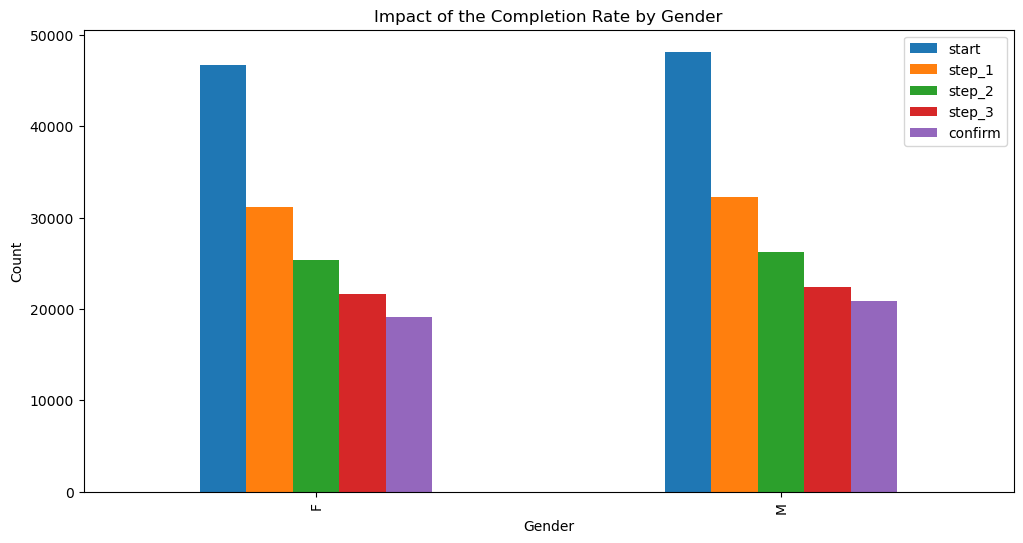

In [45]:
# Filter the 'U' gender from the dataframe before plotting
gender_group_analysis_filtered = gender_group_analysis[gender_group_analysis.index != 'U'][['start','step_1','step_2','step_3','confirm']]

# Create the bar chart for the filtered dataframe
gender_group_analysis_filtered.plot(kind='bar', figsize=(12, 6))

# Adding title and labels
plt.title('Impact of the Completion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()



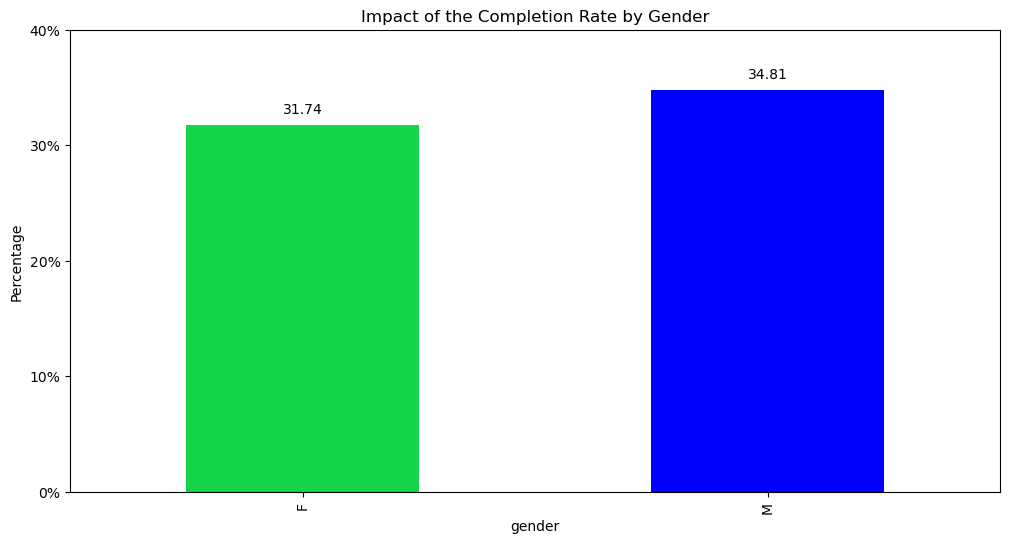

In [56]:
gender_group_analysis_filtered = gender_group_analysis[gender_group_analysis.index!= 'U']['confirm_percentage']

# Create the bar chart for the filtered dataframe
ax = gender_group_analysis_filtered.plot(color=['#15d448','blue'],kind='bar', figsize=(12, 6))

# Adding title and labels
plt.title('Impact of the Completion Rate by Gender')
plt.xlabel('gender')
plt.ylabel('Percentage')
plt.yticks([0,10,20,30,40],['0%','10%','20%','30%','40%'])

for index, value in enumerate(gender_group_analysis_filtered):
    ax.text(index, value + 1, str(round(value, 2)), color='black', ha='center')

# Display the plot
plt.show()
